# 2021 Tax Bracket Takehome Discrepencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def taxon(income):
    """
    Returns the tax on an income
    """
    bracket1  = income[income <= 9950]*0.1
    bracket2 = income[((income > 9950) & (income <= 40525))]*0.12
    bracket3 = income[((income > 40525) & (income <= 86375))]*0.22
    bracket4 = income[((income > 86375) & (income <= 164925))]*0.24
    bracket5 = income[((income > 164925) & (income <= 209425))]*0.32
    bracket6 = income[((income > 209425) & (income <= 523600))]*0.35
    bracket7 = income[(income > 523600)]*0.37
    return np.concatenate([bracket1, bracket2, bracket3, bracket4, bracket5, bracket6, bracket7])

Text(0, 0.5, 'Takehome ($)')

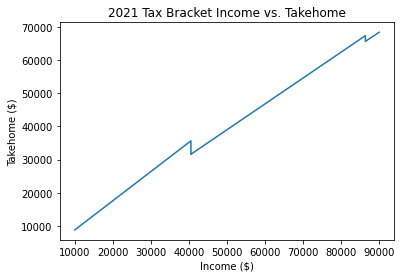

In [3]:
# Calculate takehome pay
income = np.arange(10e3, 90e3, 1)
tax = taxon(income)
takehome = income - tax

# Plot your takehome
plt.title('2021 Tax Bracket Income vs. Takehome')
plt.plot(income, takehome, label='takehome')
plt.xlabel('Income ($)')
plt.ylabel('Takehome ($)')

No handles with labels found to put in legend.


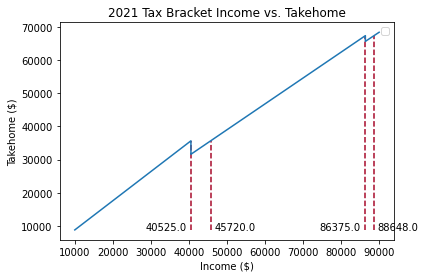

In [4]:
# Equivalent takehome calculator
startpoint = None
endpoint = None

# Plot your takehome
plt.title('2021 Tax Bracket Income vs. Takehome')
plt.legend()
plt.plot(income, takehome, label='takehome')
plt.xlabel('Income ($)')
plt.ylabel('Takehome ($)')

# Finds and plots vertical line indicators
for i in range(takehome.size-1):
    if takehome[i] > takehome[i+1]:
        startpoint = i
        while takehome[startpoint] > takehome[i+1]:
            i+=1
        endpoint = i

        # Plot equivalence
        plt.vlines(income[endpoint], takehome[0], takehome[endpoint], linestyles='--', color='#A60628')
        plt.vlines(income[startpoint], takehome[0], takehome[startpoint], linestyles='--', color='#A60628')
        plt.text(income[endpoint]+1e3, takehome[0], f'{income[endpoint]}')
        plt.text(income[startpoint]-12e3, takehome[0], f'{income[startpoint]}')
    
    startpoint = None
    endpoint = None